<html>
<head>
<meta content="text/html; charset=ISO-8859-1"
http-equiv="content-type">
<title>DATAPAK_Jupyter.html</title>
</head>
<body style="color: black; background-color: white;" alink="#000099"
link="#000099" vlink="#990099">
<br>
<div
style="text-align: center; font-family: Helvetica,Arial,sans-serif;"><img
style="width: 903px; height: 200px;"
alt="CAJAMAR DATATHON UNIVERSITYHACK 2017"
src="https://raw.githubusercontent.com/raul-pingarron/CAJAMAR-DATATHON-2017/master/logo-datathon2017.png"><br>
<big>Equipo <span style="font-weight: bold;">DATAPAK</span> <br>
Lorena Prieto, Luis Nadal, Raul PingarrÃ³n<br>
Universidad Europea de Madrid<br>
<br>
Reto: Microsoft Predictive Modelling</big><br>
<div style="text-align: left;"><big><span style="font-weight: bold;">INTRODUCCION:</span></big><br>
<span style="font-family: Helvetica;"><br>
El equipo DATAPAK de la Universidad Europea de Madrid ha afrontado el
desafÃ­o generando un motor de recomendaciÃ³n de Market Basket Analysis
que es capaz de predecir con extremada exactitud cuÃ¡l serÃ¡ el prÃ³ximo
producto financiero a contratar por el cliente.<br>
<br>
A continuaciÃ³n se presenta una serie de visualizaciones sobre el
Dataset de entrega del reto. <br>
El Dataset contiene 258.989 registros con dos variables: <span
style="font-family: Courier;">ID_Customer</span> y <span
style="font-family: Courier;">Cod_Prod</span>
de manera que cada registro identifica a un cliente y al producto
sugerido por el modelo generado a travÃ©s del motor de recomendaciÃ³n
construido.<br>
<br>
Para construir el motor de recomendaciÃ³n se ha utilizado Microsoft
Azure Machine Learning Studio, siendo el esquema del experimento el
siguiente:<br>
<br>
</span>
<div style="text-align: center;"><span style="font-family: Helvetica;"><img
style="width: 1122px; height: 703px;" alt=""
src="https://raw.githubusercontent.com/raul-pingarron/CAJAMAR-DATATHON-2017/master/MSFT_AML_DATAPAK.jpg"></span><br
style="font-family: Helvetica;">
<span style="font-family: Helvetica;"></span></div>
<br style="font-family: Helvetica;">
<br>
El algoritmo utilizado (MatchBox) es una aproximaciÃ³n hÃ­brida
(Content-Based y Collaborative-Filtering) ya que es capaz de utilizar
caracterÃ­sticas de los usuarios y de los elementos.<br>
Matchbox hace uso de la informaciÃ³n de contenido en forma de metadatos
de usuario y elemento en combinaciÃ³n con la informaciÃ³n de filtrado
colaborativo del comportamiento del usuario anterior con el fin de
predecir el valor de un elemento para un usuario. Los usuarios y
elementos estÃ¡n representados por vectores de caracterÃ­sticas que se
mapean en un "atributo de espacio" de baja dimensiÃ³n en el que la
similitud se mide en tÃ©rminos de productos internos. <br>
El modelo puede ser entrenado a partir de diferentes tipos de
retroalimentaciÃ³n para aprender las preferencias de los elementos de
usuario. En concreto se ha utilizado la alimentaciÃ³n basada en un
conjunto de clasificaciones ordinales a escala individual. <br>
<br>
El Paper que detalla el funcionamiento del algoritmo se puede consultar
en la siguiente URL:
https://www.microsoft.com/en-us/research/wp-content/uploads/2009/01/www09.pdf
<br>
<br>
</div>
</div>
<br>
</body>
</html>

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
from azureml import Workspace
ws = Workspace()
experiment = ws.experiments['da90d0d7ab424e259e80c9b9e83ce465.f-id.cdeac9d99af74c209418872b569666cf']
ds = experiment.get_intermediate_dataset(
    node_id='7f42dd1b-20ca-4806-b1f9-7ffa44bf2cc4-236',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame = ds.to_dataframe()

In [86]:
%matplotlib inline

In [87]:
frame.head()

,ID_Customer,Cod_Prod
0,B0891376-4-3-3-1-0,1401
1,B0889436-4-5-3-1-0,9993
2,B0889461-5-5-3-1-0,1401
3,B0889491-4-5-3-2-0,1401
4,B0889492-4-5-2-2-3,9993


In [88]:
# Comprobamos el numero de registros:
num_registros=frame.shape[0]
print ("El numero de registros es de",num_registros)

El numero de registros es de 258989


In [89]:
cuenta_productos_rec = frame.groupby('Cod_Prod')
print ("La lista de productos mas recomendados es:")
print (cuenta_productos_rec.size().sort_values(ascending=False))
# print (cuenta_productos_rec.count(), "\n\n")
# print (cuenta_productos_rec.get_group(1401), "\n\n")

La lista de productos mas recomendados es:
Cod_Prod
9993    72411
1401    67417
9992    47232
2602    16714
1017     9866
1020     6760
2301     5910
2702     5168
1011     4650
707      4034
702      3699
503      3485
2201     3445
201      2454
2707     2174
1022     1647
706       830
1306      287
2106      276
301       263
704       209
2102       35
1501       19
3001        4
dtype: int64


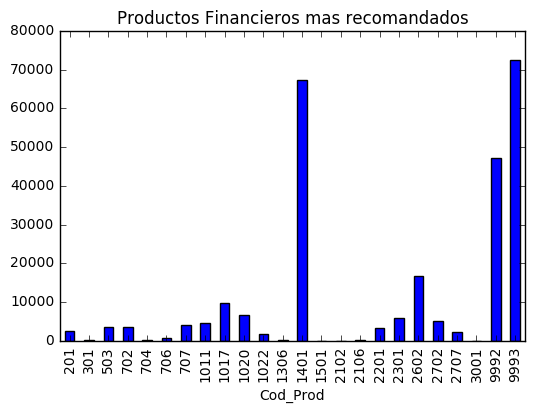

In [90]:
frame2 = frame.groupby(['Cod_Prod']).size()
myplot = frame2.plot(kind='bar', title="Productos Financieros mas recomandados")

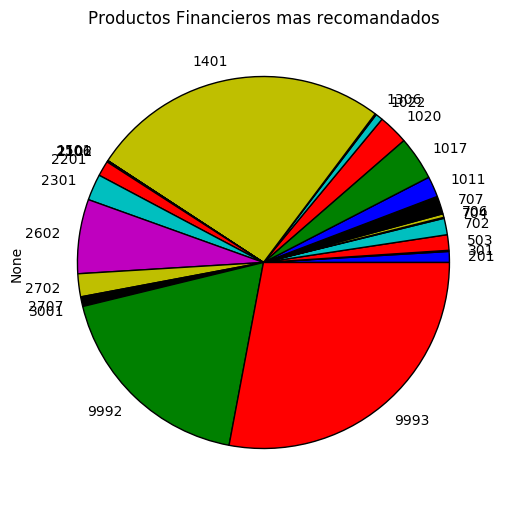

In [91]:
frame2.plot.pie(figsize=(6, 6), title="Productos Financieros mas recomandados")